# 21기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## 0. 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/tobigs/blackfriday.csv", index_col = 0) # 마지막 열 인덱스로 지정
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA
































In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [6]:
df.isna().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [7]:
df['User_ID'].value_counts()

1002063    12
1005795    12
1001980    11
1004344    11
1006036    10
           ..
1004980     1
1004385     1
1004138     1
1002648     1
1000837     1
Name: User_ID, Length: 2656, dtype: int64

In [8]:
df['Product_ID'].value_counts()

P00265242    21
P00220442    16
P00114942    15
P00010742    15
P00148642    15
             ..
P00072342     1
P00037842     1
P00207042     1
P00129742     1
P00358242     1
Name: Product_ID, Length: 1797, dtype: int64

In [9]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
# 결측치 많은 열 제거
df.drop(['Product_Category_3','Product_Category_2'], axis=1, inplace = True)

In [11]:
df['Stay_In_Current_City_Years'].value_counts()

1     1758
2      915
3      908
4+     742
0      675
Name: Stay_In_Current_City_Years, dtype: int64

In [12]:
# 순서형 자료 매핑
Stay_In_Current_City_Years_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4}
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map(Stay_In_Current_City_Years_dict)

In [13]:
df['Stay_In_Current_City_Years'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4998 entries, 0 to 4997
Series name: Stay_In_Current_City_Years
Non-Null Count  Dtype
--------------  -----
4998 non-null   int64
dtypes: int64(1)
memory usage: 78.1 KB


In [14]:
# 범주형 변주 원핫인코딩
df = pd.get_dummies(df, columns=['Age', 'Gender', 'City_Category'], drop_first=True) # 첫번째 특성은 삭제

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     4998 non-null   int64 
 1   Product_ID                  4998 non-null   object
 2   Occupation                  4998 non-null   int64 
 3   Stay_In_Current_City_Years  4998 non-null   int64 
 4   Marital_Status              4998 non-null   int64 
 5   Product_Category_1          4998 non-null   int64 
 6   Purchase                    4998 non-null   int64 
 7   Age_18-25                   4998 non-null   uint8 
 8   Age_26-35                   4998 non-null   uint8 
 9   Age_36-45                   4998 non-null   uint8 
 10  Age_46-50                   4998 non-null   uint8 
 11  Age_51-55                   4998 non-null   uint8 
 12  Age_55+                     4998 non-null   uint8 
 13  Gender_M                    4998 non-null   uint

## 2. KNN 구현 & 파라미터 튜닝

In [16]:
df.drop(['User_ID', 'Product_ID'], axis=1, inplace = True)

In [17]:
X = df.drop(['Purchase'], axis = 1)
y = df['Purchase']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [19]:
# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# 이웃 수 : 5
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 22137485.27248


In [21]:
# 이웃 수 : 10
knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 22589424.198650002


In [22]:
# Weighted KNN - distance
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 32187381.186


In [23]:
# Weighted KNN - uniform
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 46854037.392


## 3. Evaluation

In [24]:
# 가장 성능이 좋은 model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 22137485.27248


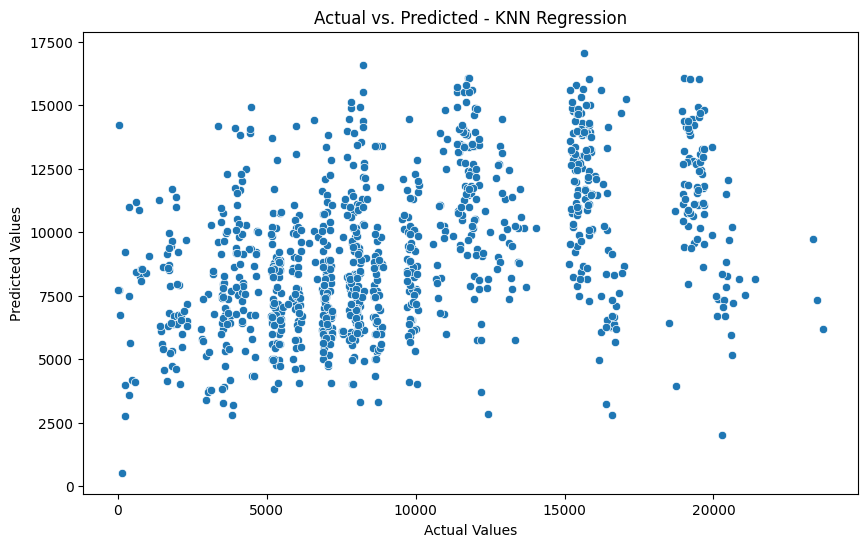

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예측값과 실제값을 데이터프레임으로 만들기
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.title('Actual vs. Predicted - KNN Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

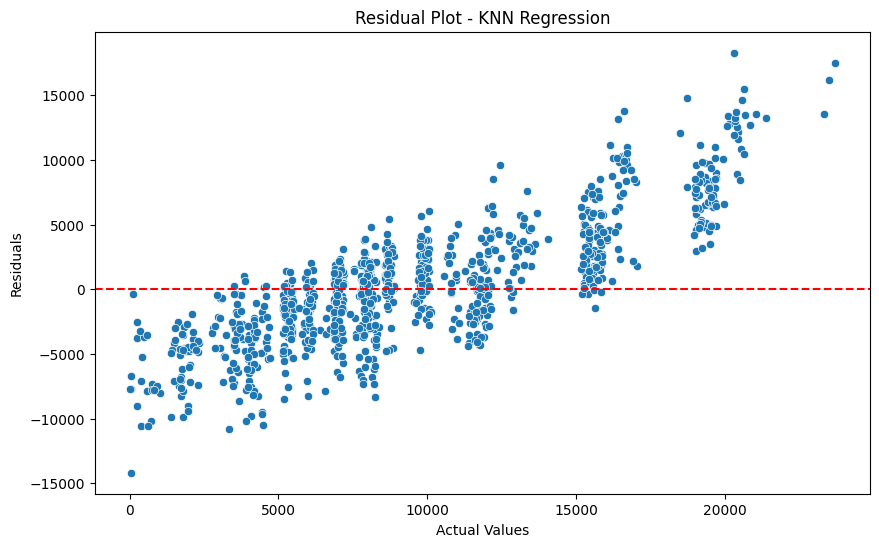

In [27]:
# 잔차 plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot - KNN Regression')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()